안녕하세요. 조윤빈입니다.



---

> **[Matplotlib] Ch 18 ~ Ch 38**

---

***Key-word***

*산점도(3차원), 히스토그램, 에러바, 파이차트, 히트맵, 여러 개의 그래프, 컬러맵 설정, 텍스트 삽입, 수학적 표현 사용, 그래프 스타일 설정, 이미지 저장, 객체 지향 인터페이스, 축 위치 조절, 이중 Y축 표시, 두 종류의 그래프, 박스 플롯, 바이올린 플롯, 다양한 도형, 다양한 패턴 채우기*

---

In [1]:
# 초기 설정 ~ 맨날 까먹쥬?
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

---

# Ch18~19. plt.scatter()

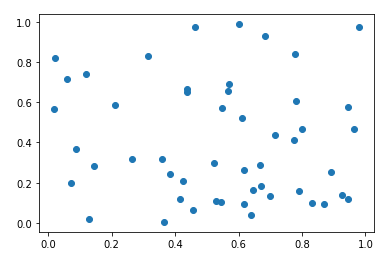


> **Scatter plot(산점도)**

*→ 두 변수의 상관 관계를 직교 좌표계의 평면에 점으로 표현하는 그래프!!*

In [2]:
# Numpy의 random 모듈
np.random.seed(0)
n = 50 # 난수 개수

In [3]:
# rand() 함수로
x = np.random.rand(n)
y = np.random.rand(n)

> **(Parameter) s, c**

*→ s는 마커의 크기, c는 마커의 색상*

In [4]:
area = (30 * np.random.rand(n))**2 # size**2 형태로 지정
colors = np.random.rand(n) # 랜덤 ~

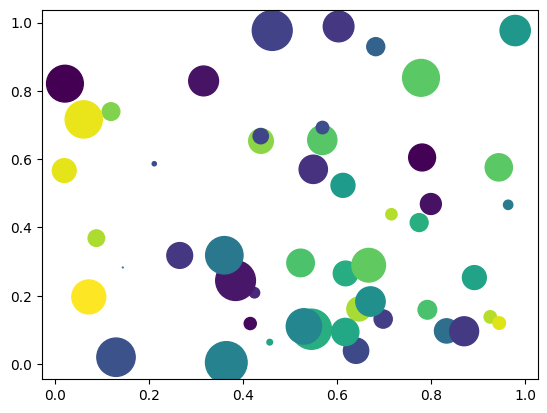

In [5]:
plt.scatter(x, y, s=area, c=colors)
# plt.scatter([2], [1], s=20**2, c='#33FFCE') # 랜덤 아니고 직접 지정 !

> (Parameter) **alpha=, cmap='  '**

*→ 투명도와 컬러맵!*

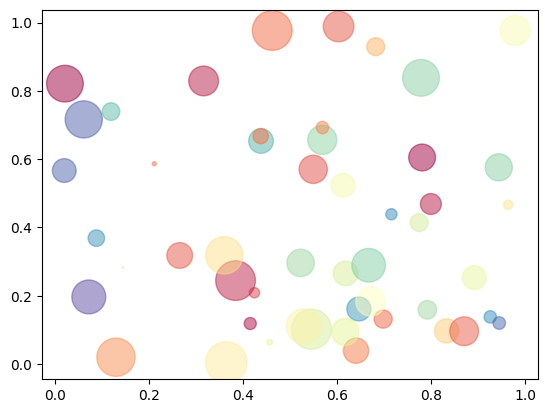

In [6]:
# 투명도
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Spectral')

In [7]:
plt.show() # 보여줘!

*뭐? 3차원도 할 수 있다고?*

>**from mpl_toolkits.mplot3d import Axes3D**

In [8]:
from mpl_toolkits.mplot3d import Axes3D # 3차원 그래프를 그리려면 추가해야함!

In [9]:
n = 100
xmin, xmax, ymin, ymax, zmin, zmax = 0, 20, 0, 20, 0, 50 # xs, ys는 0 ~ 20사이
##그렇담? zs는 ?
cmin, cmax = 0, 2 # 0 ~ 2사이의 실수, 다 다른 색 설정

In [10]:
# np.random.random_sample()
## 각 범위 안에서 임의 실수 생성!
xs = np.array([(xmax - xmin) * np.random.random_sample() + xmin for i in range(n)])
ys = np.array([(ymax - ymin) * np.random.random_sample() + ymin for i in range(n)])
zs = np.array([(zmax - zmin) * np.random.random_sample() + zmin for i in range(n)])
color = np.array([(cmax - cmin) * np.random.random_sample() + cmin for i in range(n)])

# np.random.rand()로 재탕
#ys = (xmax - xmin) * np.random.rand(n) + ymin
#zs = (xmax - xmin) * np.random.rand(n) + zmin
#color = (xmax - xmin) * np.random.rand(n) + cmin

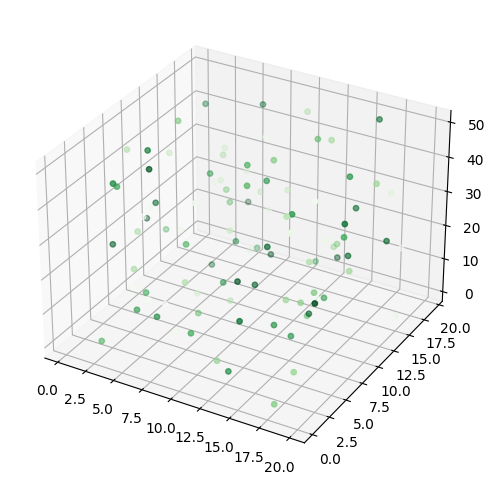

In [11]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d') # 3D axes를 만들기 위함
ax.scatter(xs, ys, zs, c=color, marker='o', s=15, cmap='Greens') # array 형태로 좌표 입력, 컬러맵은 녹색계열

---

# Ch20. plt.hist()

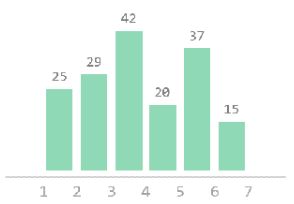

> **Histogram(히스토그램)**

*→ 도수분포표를 그래프로 나타낸 것*

*→ 가로축은 계급, 세로축은 도수(횟수)*

(array([1., 2., 1., 2., 4., 3., 2., 2., 2., 3.]),
 array([56. , 58.5, 61. , 63.5, 66. , 68.5, 71. , 73.5, 76. , 78.5, 81. ]),
 <BarContainer object of 10 artists>)

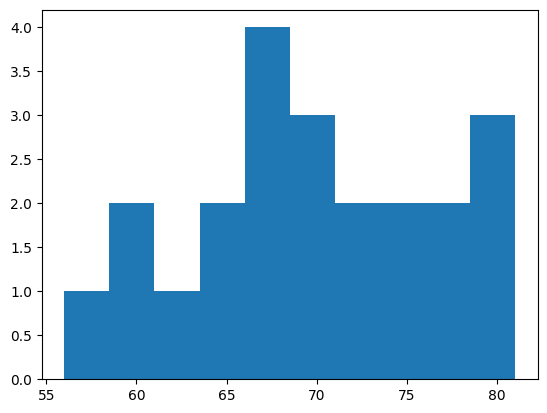

In [12]:
weight = [68, 81, 64, 56, 78, 74, 61, 77, 66, 68, 59, 71,
          80, 59, 67, 81, 69, 73, 69, 74, 70, 65]
plt.hist(weight) # 리스트 형태로 값 입력!

> **(Parameter) label='bins= '**

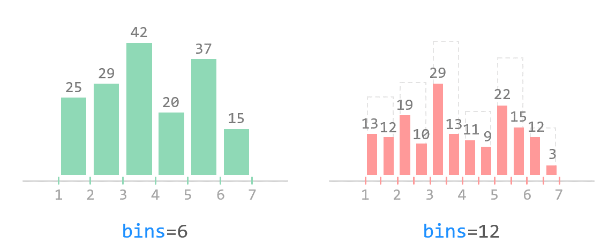

*→ 구간 개수 지정*

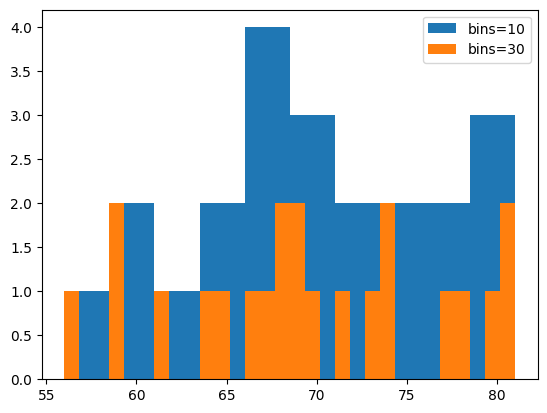

In [13]:
plt.hist(weight, label='bins=10')
plt.hist(weight, bins=30, label='bins=30')
plt.legend()

plt.show()

> **(Parameter) cumulative=**

*→ 누적 히스토그램*

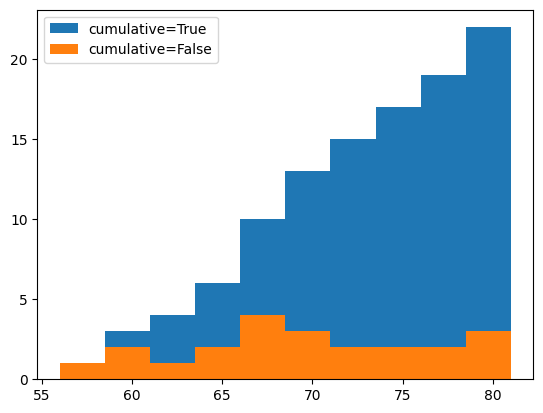

In [14]:
plt.hist(weight, cumulative=True, label='cumulative=True') #True로 설정해야 나옴
plt.hist(weight, cumulative=False, label='cumulative=False') #디폴트 값이라 생략 ㄱㄴ
plt.legend(loc='upper left')
plt.show()

> **(Parameter) histtype='bar'**

*→ 히스토그램 종류 지정 (4가지)*

* bar(디폴트 값)
* barstacked
* step
* stepfilled

In [16]:
weight2 = [52, 67, 84, 66, 58, 78, 71, 57, 76, 62, 51, 79,
        69, 64, 76, 57, 63, 53, 79, 64, 50, 61] # 비교하려고 넣음

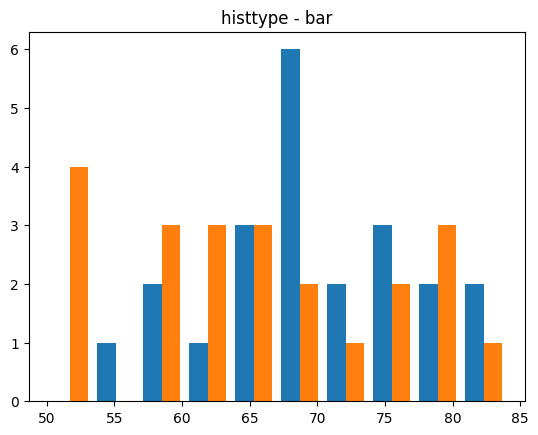

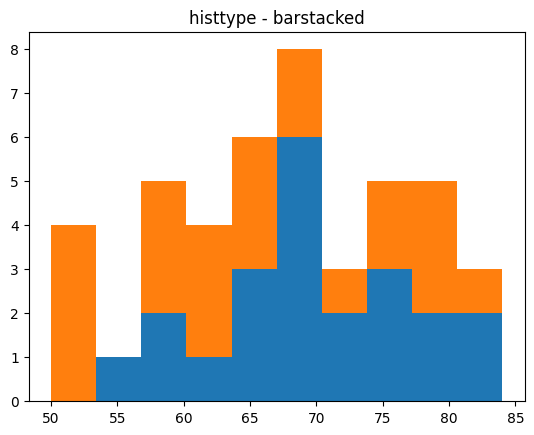

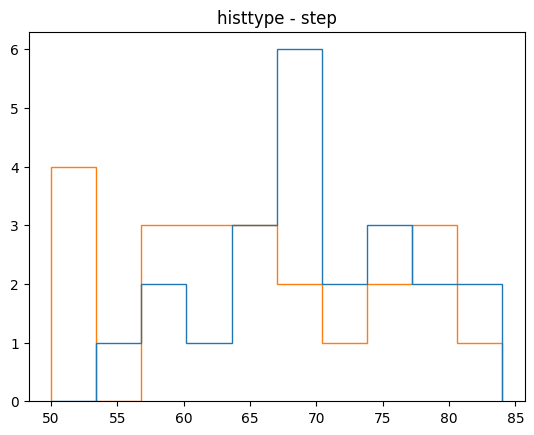

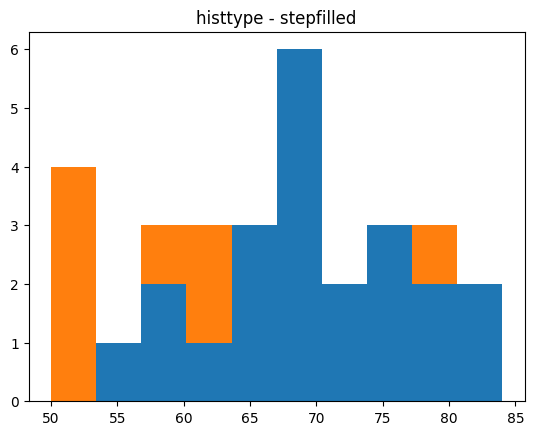

In [17]:
plt.hist((weight, weight2), histtype='bar')
plt.title('histtype - bar')
plt.figure()

plt.hist((weight, weight2), histtype='barstacked')
plt.title('histtype - barstacked')
plt.figure()

plt.hist((weight, weight2), histtype='step')
plt.title('histtype - step')
plt.figure()

plt.hist((weight, weight2), histtype='stepfilled')
plt.title('histtype - stepfilled')
plt.show()

> **NumPy 난수의 분포 나타내기**

In [18]:
a = 2.0 * np.random.randn(10000) + 1.0 #array a는 표준편차 2.0, 평균 1.0을 갖는 정규분포
b = np.random.standard_normal(10000) #array b는 표준정규분포
c = 20.0 * np.random.rand(5000) - 10.0 #array c -10.0 ~ 10.0 사이의 균일한 분포를 갖는 5000개의 임의의 값

(array([0.06105612, 0.04203864, 0.050046  , 0.04103772, 0.0600552 ,
        0.05705244, 0.06105612, 0.05204784, 0.0550506 , 0.04303956,
        0.06105612, 0.0450414 , 0.05304876, 0.050046  , 0.05204784,
        0.04904508, 0.04203864, 0.04804416, 0.05404968, 0.03803496,
        0.05705244, 0.04904508, 0.05705244, 0.04704324, 0.0400368 ,
        0.04103772, 0.04404048, 0.050046  , 0.050046  , 0.04604232,
        0.05104692, 0.05404968, 0.05304876, 0.04804416, 0.04704324,
        0.05104692, 0.03903588, 0.03603312, 0.04804416, 0.05104692,
        0.04203864, 0.04303956, 0.04604232, 0.06105612, 0.04804416,
        0.050046  , 0.05104692, 0.05304876, 0.05705244, 0.04704324,
        0.06806256, 0.04804416, 0.05204784, 0.06606072, 0.05404968,
        0.03803496, 0.04904508, 0.06405888, 0.05905428, 0.05705244,
        0.04704324, 0.050046  , 0.05304876, 0.05905428, 0.04203864,
        0.03903588, 0.04604232, 0.05104692, 0.050046  , 0.04604232,
        0.05304876, 0.05605152, 0.0550506 , 0.05

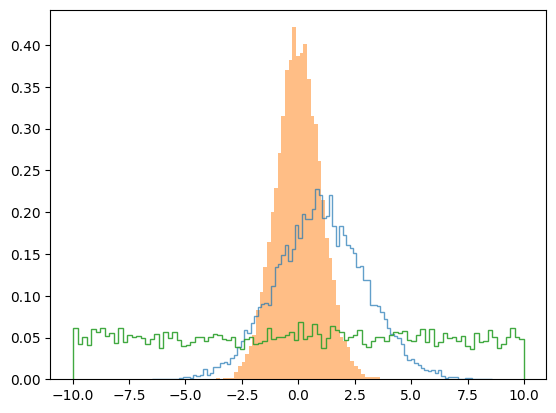

In [19]:
plt.hist(a, bins=100, density=True, alpha=0.7, histtype='step') #density=True는 밀도함수! (아래 면적 0~)
plt.hist(b, bins=50, density=True, alpha=0.5, histtype='stepfilled') #alpha는 투명도~, 0~1사이로 설정 가능!
plt.hist(c, bins=100, density=True, alpha=0.9, histtype='step')

# Ch21. plt.errorbar()

# Ch22. plt.pie()

# Ch23. plt.matshow()

# Ch24. plt.subplot()

# Ch25. Colormap

# Ch26. plt.text()

# Ch27. 수학적 표현 사용법

# Ch28. plt.rcParams['']

# Ch29. plt.savefig()

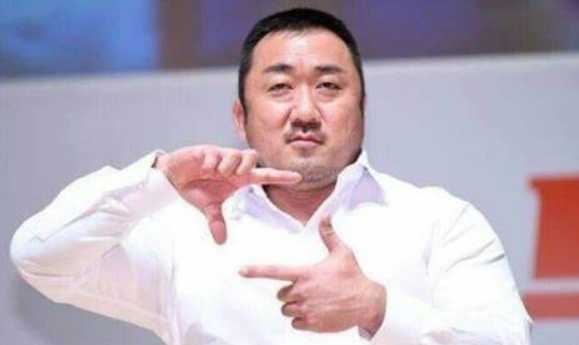

# Ch30~31. 객체 지향 인터페이스

# Ch32. Matplotlib 축 위치 조절

# Ch33. 이중 Y축 표시하기

# Ch34. 두 종류의 그래프 그리기

# Ch35. 박스 플롯 그리기

# Ch36. 바이올린 플롯 그리기

# Ch37. 다양한 도형 삽입하는 법

# Ch38. 다양한 패턴 채우기

# 끝 !!!

---

***다들 수고하셨습니다!^O^***

---